In [1]:
import astropy.units as u
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import pathlib
import wget
import matplotlib.colors as plt_colors
from scipy.stats import linregress

# 3 The radial metallicity relation in simulated data

3.1 Download the file from the link above into data/. Load the file with python and then perform the following tasks to create figures that are saved in figures/:

In [2]:
# Create the 'data' directory if it doesn't exist
data_dir = pathlib.Path("data")
data_dir.mkdir(exist_ok=True)

filename = wget.download(r"https://github.com/svenbuder/astr4004_2024_week7/raw/refs/heads/main/data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits", out=str(data_dir))


In [17]:
# Access downloaded file
fits_file = pathlib.Path('data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits')
assert fits_file.exists()

# Open data file
hdu_list = fits.open(fits_file)

# Inspect headers
display(hdu_list.info())
hdu_list[1].header.items

Filename: data\nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (678,)   uint8   
  1  /Users/buder/Simulations/preparing_NIHAO/NIHAO_prepared/NIHAO_g8.26e    1 BinTableHDU     21   511520R x 4C   [E, E, E, D]   


None

<bound method Header.items of XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                   20 / width of table in bytes                        
NAXIS2  =               511520 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                    4 / number of columns                              
EXTNAME = '/Users/buder/Simulations/preparing_NIHAO/NIHAO_prepared/NIHAO_g8.26e'
TTYPE1  = 'x       '           / label for column 1                             
TFORM1  = 'E       '           / format for column 1                            
TTYPE2  = 'y       '           / label for column 2                            

3.2 Plot a 2-panel figure:

– (a) Logarithmic density plot of RGal. vs. A(O), with a linear fit and legend.

– (b) Residuals of the fit, RGal. vs. ΔA(O).

Use a python fitting tool to fit a linear function to the data, reporting the intercept and slope with uncertainties. Include any hyperparameters used.

Calculate the radial position using x,y,z coordinates.

In [4]:
# Dump data into array
data = hdu_list[1].data

# Calculate the radius for each data point
RGal = np.sqrt(data['x']**2 + data['y']**2 + data['z']**2)

# Extract gas phase metallicity from data
A_O = data["A_O"]



Now do the plotting:

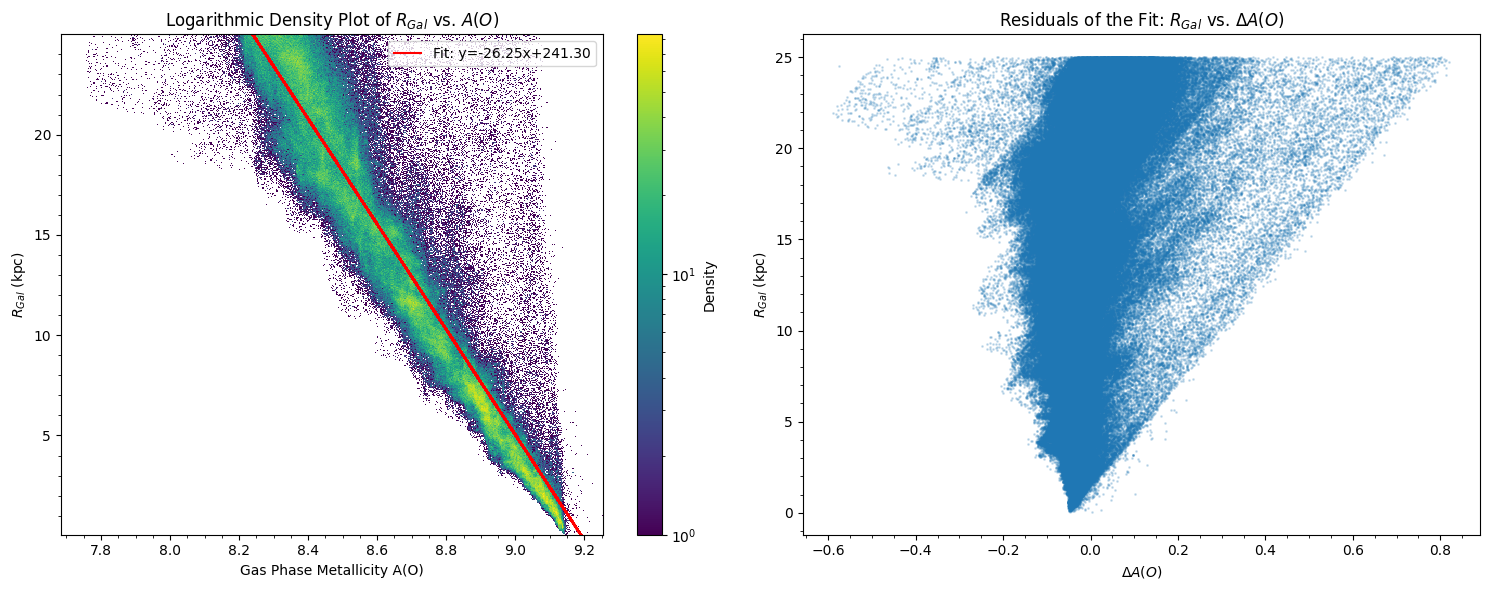

In [16]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


# Create the density plot
hist1 = ax1.hist2d(A_O, RGal, bins=500, cmap='viridis', norm=plt_colors.LogNorm())
fig.colorbar(hist1[3], ax=ax1, label='Density')

# Linear fit
slope, intercept, r_value, p_value, std_err = linregress(A_O, RGal)
ax1.plot(A_O, intercept + slope * A_O, 'r', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')

# Add labels and legend
ax1.set_xlabel('Gas Phase Metallicity A(O)')
ax1.set_ylabel('$R_{Gal}$ (kpc)')
ax1.legend()
ax1.set_title('Logarithmic Density Plot of $R_{Gal}$ vs. $A(O)$')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

# Calculate residuals
residuals = A_O - (RGal - intercept)/slope

# Plot residuals on the second axis
ax2.scatter(residuals, RGal, alpha=0.2, s=1)

# Add labels and title
ax2.set_xlabel('$\\Delta A(O)$')
ax2.set_ylabel('$R_{Gal}$ (kpc)')
ax2.set_title('Residuals of the Fit: $R_{Gal}$ vs. $\\Delta A(O)$')
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

# Show the plots
plt.tight_layout()
plt.show()
